# Project 5 Heart Disease Prediction

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

### 1. Importing Libraries and Dataset

In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

hddata = pd.read_csv('/Users/johnnysin/Downloads/heart_disease_data.csv')

In [22]:
hddata.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  
7   0     3       1  
8   0     3       1  
9   0     2       1

In [20]:
# getting column names and data type
hddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
row = hddata.shape[0]
col = hddata.shape[1]
print(f'there are {row} rows and {col} columns in this dataset')

there are 303 rows and 14 columns in this dataset


In [23]:
hddata.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### there are no missing values in this dataset

In [28]:
hddata.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

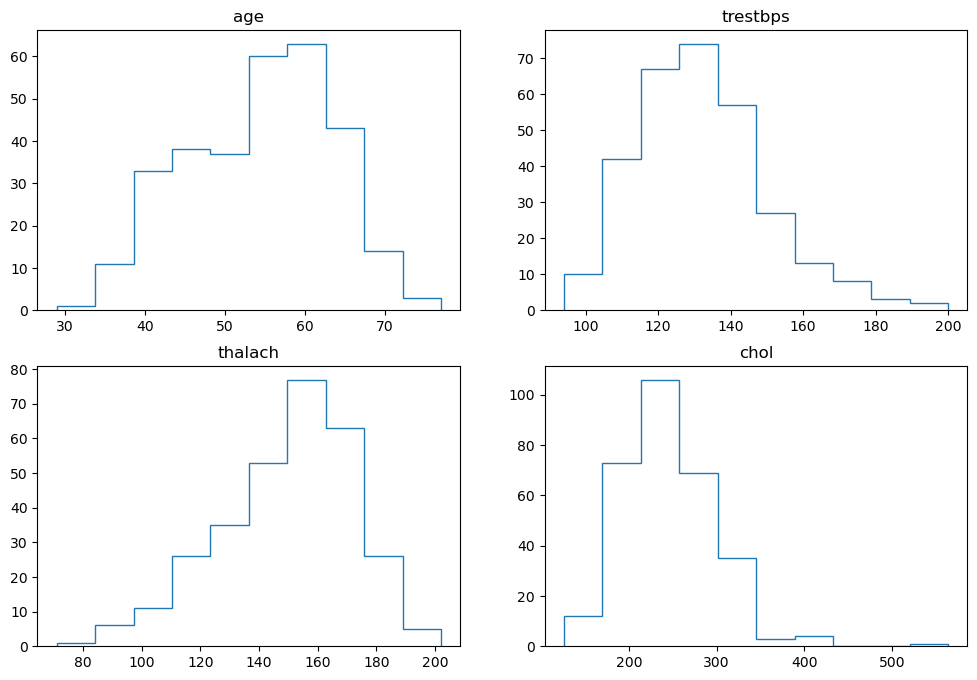

In [56]:
# Multi-plot summary
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(12,8))
axes[0,0].hist(hddata['age'], histtype = 'step', fill=False)
axes[0,0].set_title('age')
axes[0,1].hist(hddata['trestbps'], histtype = 'step', fill=False)
axes[0,1].set_title('trestbps')
axes[1,1].hist(hddata['chol'], histtype = 'step', fill=False)
axes[1,1].set_title('chol')
axes[1,0].hist(hddata['thalach'], histtype = 'step', fill=False)
axes[1,0].set_title('thalach')
plt.show()

In [30]:
hddata['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

This shows that the disease and no-disease target values are not even distributed although very close

### 2. Splitting Data into X and Y 

In [31]:
X=hddata.drop(columns = 'target', axis = 1)
Y=hddata['target']

In [32]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [46]:
X_new = preprocessing.StandardScaler().fit_transform(X)
X_new

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [33]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,stratify=Y,random_state=2)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_new,Y, test_size = 0.2,stratify=Y,random_state=2)

In [36]:
print(X_train.shape, X_test.shape)

(242, 13) (61, 13)


### 3. Model Training and Evaluation

In [49]:
model = LogisticRegression()
model2 = LogisticRegression()

In [50]:
model.fit(X_train, Y_train)
model2.fit(X_train2, Y_train2)

/Users/johnnysin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
Y_predict = model.predict(X_test)
Y_predict2 = model2.predict(X_test2)

In [52]:
acc = accuracy_score(Y_test, Y_predict)
acc2 = accuracy_score(Y_test2, Y_predict2)
print(f'the accuracy of the model is {acc}, while using normalized values, the accuracy score is {acc2}')

the accuracy of the model is 0.819672131147541, while using normalized values, the accuracy score is 0.7868852459016393


Reason why the normalized dataset might be a lower accuracy is because I did not account for binary integers as a categorical rather than a numerical column

### 4. Building a Predictive Model

We will be building a model that can predict whether the patient with an array of features is likely to have disease or not

In [59]:
sample_patient = (75, 1, 2, 145, 233, 1, 0, 150, 0,2.3, 0, 0, 1)

In [60]:
input_array_data = np.asarray(sample_patient)
input_data_reshaped=input_array_data.reshape(1,-1)

In [64]:
prediction = model.predict(input_data_reshaped)

if(prediction[0]==1):
    print('Person has Heart Disease')
else:
    print('Person does not have Heart Disease')

Person has Heart Disease


/Users/johnnysin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
